Ranked list of stations:

- Filter: neighborhoods with most traffic (from Andrew's code)
- Then rank by tech neighborhoods, then highest income

Time to spend at each station:

- Analyze hours for the stations chosen

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_pickle('data_clean.pkl')
df.drop('Mean Entries & Exits',axis=1,inplace=True)
df.rename(columns={'Cum. Entries & Exits': 'traffic'}, inplace=True)
df.head()

,TURNSTILE,STATION,year,month,day,hour,WD vs WE,traffic
2,R001|00-00-00,WHITEHALL S-FRY,2016,2,27,8,WE,28.0
3,R001|00-00-00,WHITEHALL S-FRY,2016,2,27,12,WE,202.0
4,R001|00-00-00,WHITEHALL S-FRY,2016,2,27,16,WE,297.0
5,R001|00-00-00,WHITEHALL S-FRY,2016,2,27,20,WE,306.0
8,R001|00-00-00,WHITEHALL S-FRY,2016,2,28,8,WE,24.0


# 30 busiest stations, by day 

In [25]:
weekdays = df[df['WD vs WE'] == 'WD']
weekdays_agg = weekdays.groupby(['STATION','year','month','day']).agg({'traffic':'sum'}).reset_index()
stations_av = weekdays_agg.groupby(['STATION']).agg({'traffic':'mean'}).reset_index()
stations_av.sort_values('traffic',ascending=False,inplace=True)
stations_av.head()

,STATION,traffic
233,GRD CNTRL-42 ST,673086.096154
59,34 ST-HERALD SQ,603255.263462
84,57 ST-7 AV,516912.361538
61,34 ST-PENN STA,376927.634615
9,125 ST,370732.907692


In [185]:
tech_stations = ['TIMES SQ-42 ST','8 ST-NYU','ASTOR PL','14 ST-UNION SQ','34 ST-HUDSON YD','34 ST-PENN STA',
                 '28 ST','23 ST','SPRING ST','PRINCE ST','CORTLANDT ST','WTC-CORTLANDT','FULTON ST',
                 'PARK PLACE','18 ST','14 ST']

stations_av['tech_hub'] = [True if station in tech_stations else False for station in stations_av['STATION']]

381 total stations.

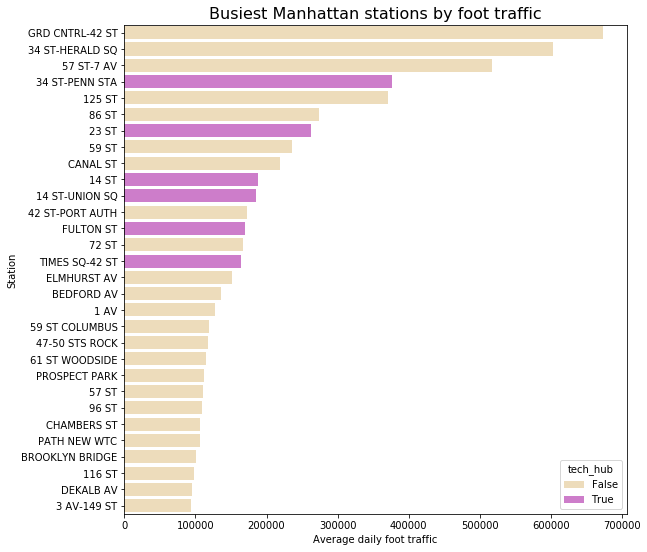

In [186]:
plt.figure(figsize=(9,9))
sns.barplot(y='STATION', x='traffic', data=stations_av[:30],
            hue='tech_hub', dodge=False, palette=['wheat','orchid']);
# sns.barplot(y='STATION', x='traffic', data=stations_av[:30],
#             hue='tech_hub', dodge=False, palette=['wheat','wheat']);
plt.title('Busiest Manhattan stations by foot traffic',fontsize=16,);
plt.xlabel('Average daily foot traffic');
plt.ylabel('Station');
#plt.legend('');
#plt.legend(title='Tech Hub');

In [191]:
sum_df.head()

,TURNSTILE,STATION,year,month,day,hour,WD vs WE,traffic
254126,R012|00-00-00,34 ST-PENN STA,2016,2,29,11,WD,945.0
254127,R012|00-00-00,34 ST-PENN STA,2016,2,29,15,WD,101.0
254128,R012|00-00-00,34 ST-PENN STA,2016,2,29,19,WD,428.0
254129,R012|00-00-00,34 ST-PENN STA,2016,2,29,23,WD,102.0
254132,R012|00-00-00,34 ST-PENN STA,2016,3,1,11,WD,904.0


,STATION,hour,traffic
0,14 ST-UNION SQ,8,367.576074
1,14 ST-UNION SQ,9,730.837481
2,14 ST-UNION SQ,10,471.224490
3,14 ST-UNION SQ,11,212.400000
4,14 ST-UNION SQ,12,1198.684590
...,...,...,...
68,TIMES SQ-42 ST,16,727.913443
69,TIMES SQ-42 ST,18,872.444444
70,TIMES SQ-42 ST,19,1227.504532
71,TIMES SQ-42 ST,20,1311.449632


In [198]:
sum_df = weekdays[weekdays['STATION'].isin(['34 ST-PENN STA','CANAL ST','14 ST-UNION SQ','FULTON ST','TIMES SQ-42 ST'])]
sum_df = sum_df.groupby(['STATION','hour'],as_index=False)['traffic'].mean()

Text(0, 0.5, 'Average foot traffic')

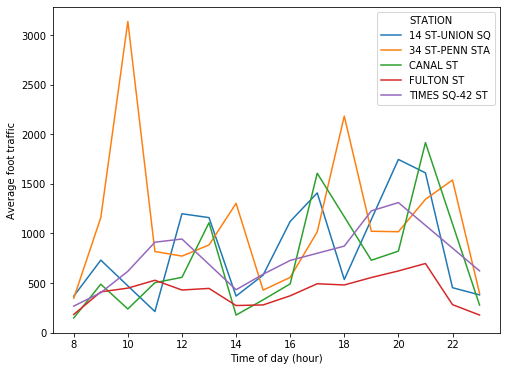

In [214]:
plt.figure(figsize=(8,6))
sns.lineplot('hour',sum_df['traffic'],hue='STATION',data=sum_df);
plt.xlabel('Time of day (hour)');
plt.ylabel('Average foot traffic')

# Map 

In [125]:
import geopandas
from shapely.geometry import Point

In [156]:
stations_geo.head()

,STATION,lat,long
0,1 AV,40.731759,-73.982277
1,116 ST,40.808350,-73.963590
2,125 ST,40.804622,-73.937429
3,14 ST,40.738228,-73.996209
4,14 ST-UNION SQ,40.735000,-73.991000


In [174]:
geometry = [Point(xy) for xy in zip(stations_geo.lat, stations_geo.long)]
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(stations_geo.drop(['long','lat'],axis=1), 
                   crs=crs, 
                   geometry=geometry)

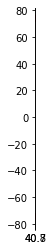

In [178]:
gdf.plot(color='red')

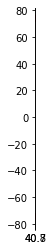

In [175]:
gdf.plot(color='red')

In [119]:
fp = 'Data/Borough Boundaries/geo_export_fa31e4b5-7de7-43c5-8bbb-fccabbec89d0.shp'
map_df = geopandas.read_file(fp)

In [159]:
stations_geo.head()

,STATION,lat,long
0,1 AV,40.731759,-73.982277
1,116 ST,40.808350,-73.963590
2,125 ST,40.804622,-73.937429
3,14 ST,40.738228,-73.996209
4,14 ST-UNION SQ,40.735000,-73.991000


In [144]:
gdf

,STATION,geometry
0,1 AV,POINT (40.731759 -73.982277)
1,116 ST,POINT (40.80835 -73.96359)
2,125 ST,POINT (40.80462199999999 -73.93742900000001)
3,14 ST,POINT (40.738228 -73.99620899999999)
4,14 ST-UNION SQ,POINT (40.735 -73.991)
5,18 ST,POINT (40.74104000000001 -73.99787099999999)
6,23 ST,POINT (40.744 -73.99600000000001)
7,28 ST,POINT (40.747 -73.99299999999999)
8,3 AV-149 ST,POINT (40.816329 -73.917956)
9,34 ST-HERALD SQ,POINT (40.749142 -73.98881)


In [146]:
gdf

,STATION,geometry
0,1 AV,POINT (40.731759 -73.982277)
1,116 ST,POINT (40.80835 -73.96359)
2,125 ST,POINT (40.80462199999999 -73.93742900000001)
3,14 ST,POINT (40.738228 -73.99620899999999)
4,14 ST-UNION SQ,POINT (40.735 -73.991)
5,18 ST,POINT (40.74104000000001 -73.99787099999999)
6,23 ST,POINT (40.744 -73.99600000000001)
7,28 ST,POINT (40.747 -73.99299999999999)
8,3 AV-149 ST,POINT (40.816329 -73.917956)
9,34 ST-HERALD SQ,POINT (40.749142 -73.98881)


In [154]:
gdf.plot(color='red',ax=ax);

<Figure size 432x288 with 0 Axes>

(40.64611539517085, 40.95553277599955)

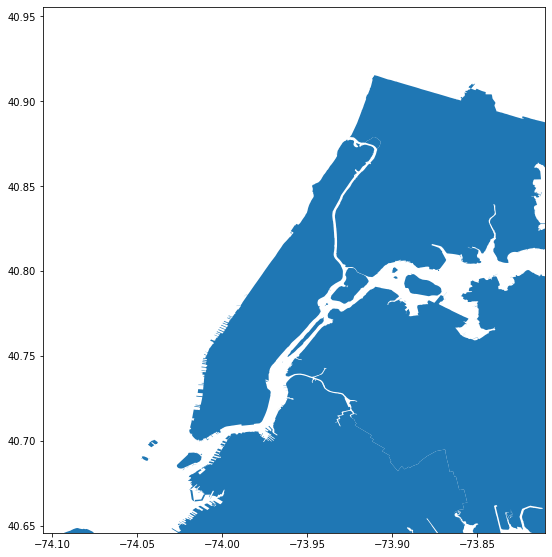

In [181]:
f, ax = plt.subplots(1,1, figsize=(9, 12))
map_df.plot(ax=ax);
minx, miny, maxx, maxy = map_df.total_bounds
# ax.set_xlim(minx+.15, maxx-.11)
# ax.set_ylim(miny+.15, maxy+.04)

# ax.set_xlim(minx+.18, maxx-.16)
# ax.set_ylim(miny+.17, maxy)

gdf.plot(color='red', ax=ax);

In [24]:
stations_av

,STATION,traffic
233,GRD CNTRL-42 ST,673086.096154
59,34 ST-HERALD SQ,603255.263462
84,57 ST-7 AV,516912.361538
61,34 ST-PENN STA,376927.634615
9,125 ST,370732.907692
...,...,...
148,BEACH 98 ST,869.357692
356,TOMPKINSVILLE,743.325000
141,BEACH 105 ST,485.319231
162,BROAD CHANNEL,360.050000


In [5]:
stations_geo = pd.read_csv("Data/stations.csv")

In [6]:
stations_geo.head()

,STATION,lat,long
0,1 AV,40.731759,-73.982277
1,116 ST,40.808350,-73.963590
2,125 ST,40.804622,-73.937429
3,14 ST,40.738228,-73.996209
4,14 ST-UNION SQ,40.735000,-73.991000


In [7]:
weekdays = pd.merge(weekdays,stations_geo,how='left',on='STATION')

In [8]:
weekdays.columns

Index(['TURNSTILE', 'STATION', 'year', 'month', 'day', 'hour', 'WD vs WE',
       'traffic', 'lat', 'long'],
      dtype='object')

In [14]:
import geopandas as gpd

In [57]:
stations_geo

,station,lat,long
0,1 AV,40.731759,-73.982277
1,116 ST,40.808350,-73.963590
2,125 ST,40.804622,-73.937429
3,14 ST,40.738228,-73.996209
4,14 ST-UNION SQ,40.735000,-73.991000
5,18 ST,40.741040,-73.997871
6,23 ST,40.744000,-73.996000
7,28 ST,40.747000,-73.993000
8,3 AV-149 ST,40.816329,-73.917956
9,34 ST-HERALD SQ,40.749142,-73.988810


# Income data

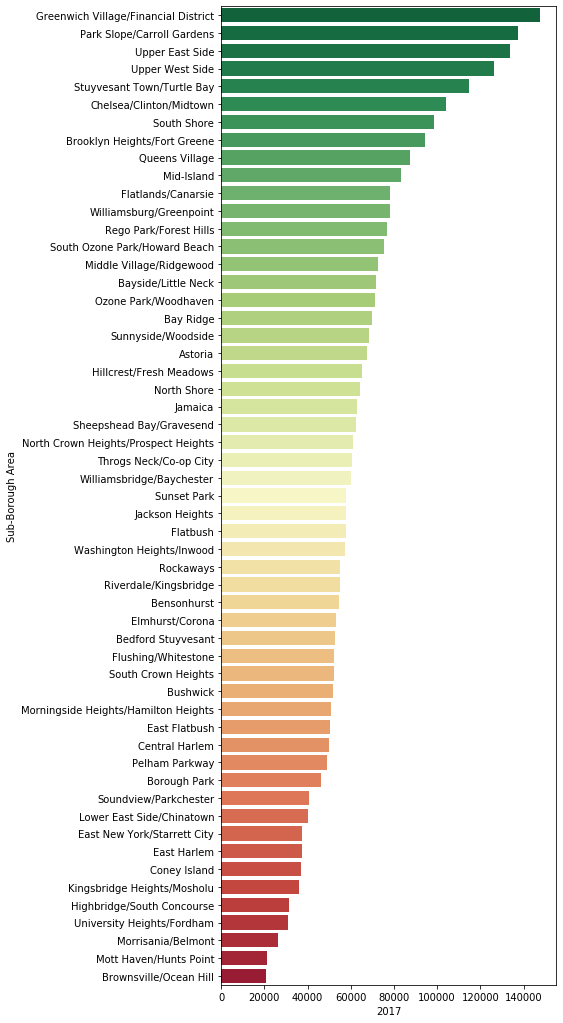

In [12]:
zipcode_df = pd.read_csv('Data/sub-borougharea-medianhouseholdincome2018.csv')
zipcode_df.groupby('Sub-Borough Area',as_index=False)['2017','2016'].mean().shape

plt.figure(figsize=(6,18))
sns.barplot(y='Sub-Borough Area', x='2017', 
            data=zipcode_df.sort_values('2017',ascending=False),
            palette = sns.color_palette("RdYlGn_r", len(zipcode_df)));